In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os, gc
# os.listdir()


In [2]:
train_df = pd.read_csv('store_data/train_df_save2.csv')
test_df  = pd.read_csv('store_data/test_df_save2.csv')
sub      = pd.read_csv('sample_submission_24jSKY6.csv')
info_df  = pd.read_excel('train_aox2Jxw/Data Dictionary.xlsx')

train_df.shape, test_df.shape

((224607, 52), (112392, 51))

In [38]:
def get_skew(data): return data.skew()
def get_unique(data): return data.unique().shape[0]

# train_df.groupby(['branch_id'])['asset_cost','disbursed_amount'].aggregate({
#     'asset_cost':['min','max','std', 'mean', 'sum','mad','count',get_unique, get_skew]
#     'disbursed_amount':['min','max','std', 'mean', 'sum','mad','count',get_unique, get_skew]
# })

temp = train_df.groupby(['State_ID'])['asset_cost','disbursed_amount'].aggregate(
    ['min','max','std', 'mean', 'sum','mad','count',get_unique, get_skew])
temp

asset_cost                                                   \
                min      max           std          mean         sum   
State_ID                                                               
1             37230   254177  12557.321516  67035.219493   583943797   
2             40000   188300  14875.702574  69777.340781   284203109   
3             40180   264500  20664.840462  84951.397415  2839585410   
4             37000  1328954  17167.646254  75330.385874  3292389845   
5             38500   246743  20412.366310  76440.660574   748583389   
6             37658   244607  13180.724704  68769.425385  2250685754   
7             40884   252140  26083.864898  83557.507388   554153389   
8             38738   255315  17816.799417  77143.149851   904503432   
9             39446  1628992  21628.333542  74634.939282  1114896723   
10            42397   168698  16356.468760  73119.493484   258111812   
11            38650   212542  13468.770526  65383.367665   427868758   
12            40488   199099  17804.734025  84566.881181   352305627   
13            40538   223396  21406.747834  83951.591422  1481661637   
14            40350   253442  11487.940968  74513.575678   683811084   
15            37377   252434  16130.118126  68257.586785   337806797   
16            37129   240300  21341.949680  70321.612681   184101982   
17            37310   247045  12487.191138  74859.050502   275705883   
18            40000   220857  18366.384045  70430.723444   374621018   
19            53647   136075  10224.330470  77136.131167    64100125   
20            51459   167976  15108.018271  71187.049180    13027230   
21            57760   189586  12390.455281  71653.993421    10891407   
22            53953   109217  12393.691076  71151.810811     5265234   

                                                    disbursed_amount          \
                   mad  count get_unique   get_skew              min     max   
State_ID                                                                       
1          7431.491466   8711       4544   3.594636            13990  100000   
2          8966.218736   4073       2297   3.066186            17019  100000   
3         15647.681497  33426      12564   1.686936            13640  100000   
4         10343.105630  43706      13663  11.388141            13652  100000   
5         14540.225379   9793       4993   1.910966            13369  100000   
6          7138.619244  32728      11540   4.154061            13940  100000   
7         19161.789926   6632       3461   1.869046            15619  100000   
8         12678.720665  11725       7197   1.658278            13600  100000   
9          8601.892002  14938       5506  29.344999            14324  100000   
10        10686.081372   3530       1553   2.347840            17634  100000   
11         6547.313732   6544       3306   4.316242            14320  100000   
12        14088.982019   4166       2350   1.330078            13320  100000   
13        16120.153090  17649       7637   1.859019            13664  100000   
14         7301.860866   9177       5107   3.056194            18619  100000   
15         9682.451254   4949       2797   2.662505            13990  100000   
16        11710.757979   2618       1743   3.233716            16880  100000   
17         7376.174728   3683       2533   4.133493            14215  100000   
18        10049.405202   5319       3081   3.344524            15425  100000   
19         7226.067059    831        525   1.907466            20033   97490   
20         8644.696587    183        136   3.533140            14140  100000   
21         5590.162656    152        126   6.822212            27239   90604   
22         8704.354273     74         62   1.665048            31847   80460   

                                                                       \
                   std          mean         sum           mad  count   
State_ID                                                     

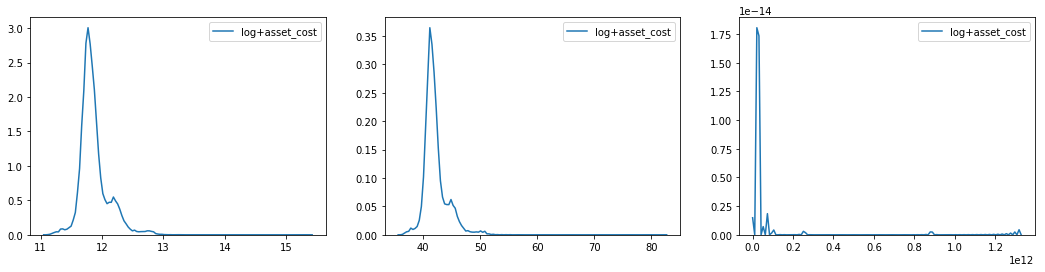

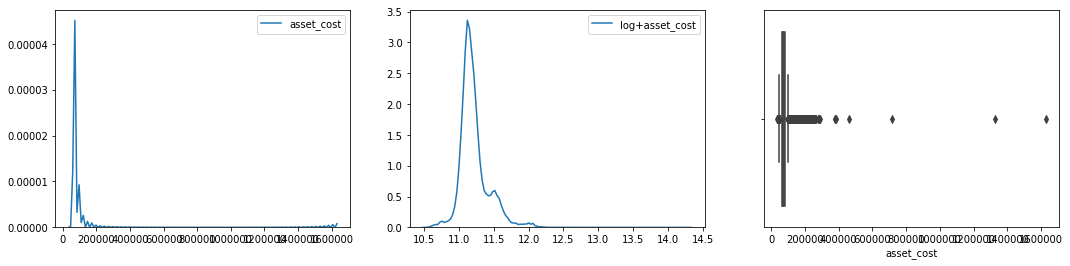

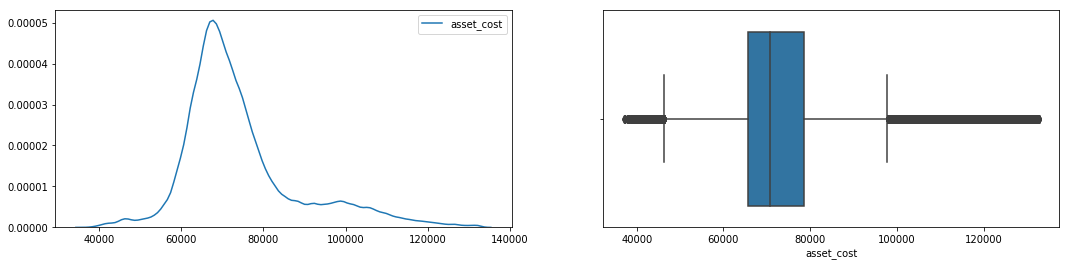

In [60]:
from scipy.stats import boxcox
fig, ax = plt.subplots(1,3,figsize=(18,4))
# sns.kdeplot(train_df[col], ax=ax[0], label=col)
col ='asset_cost'
sns.kdeplot(boxcox(train_df[col]+1, lmbda=0.01), ax=ax[0], label='log+'+col)
sns.kdeplot(boxcox(train_df[col]+1, lmbda=0.2), ax=ax[1], label='log+'+col)
sns.kdeplot(boxcox(train_df[col]+1, lmbda=2), ax=ax[2], label='log+'+col)

# col = 'PRIMARY.INSTAL.AMT'

fig, ax = plt.subplots(1,3,figsize=(18,4))
sns.kdeplot(train_df[col], ax=ax[0], label=col)
sns.kdeplot(np.log(train_df[col]), ax=ax[1], label='log+'+col)
sns.boxplot(train_df[col], ax=ax[2])

fig, ax = plt.subplots(1,2,figsize=(18,4))
tp = train_df[col][(np.abs(stats.zscore(train_df[[col]])) < 3).all(axis=1)]
sns.kdeplot(tp, ax=ax[0])
sns.boxplot(tp, ax=ax[1])

training data:  (224607, 52) ==> (220383, 52) ==> (218802, 52)
testing data:   (112392, 51) ==> (110247, 51) ==> (109570, 51)


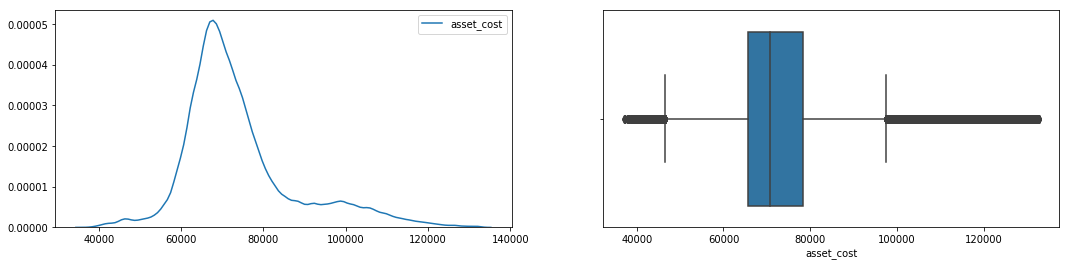

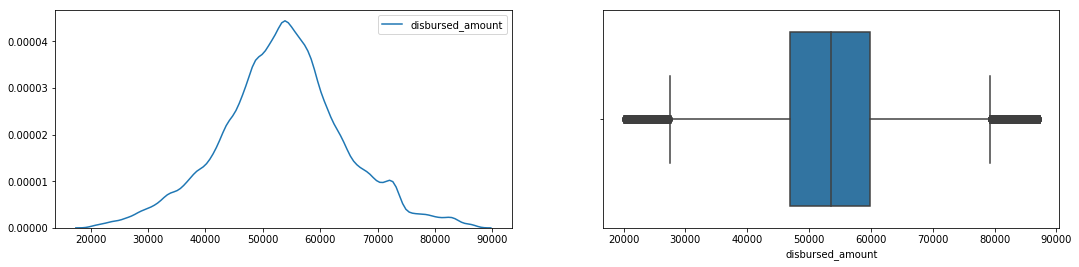

In [3]:
col = 'branch_id'
col1 = 'asset_cost'
col2 = 'disbursed_amount'

col = col1
print("training data: ", train_df.shape,"==>", end=" ")
tp_tr = train_df[(np.abs(stats.zscore(train_df[[col]])) < 3).all(axis=1)]
print(tp_tr.shape, "==>", end=" ")
col = col2
tp_tr = tp_tr[(np.abs(stats.zscore(tp_tr[[col]])) < 3).all(axis=1)]
print(tp_tr.shape)

col = col1
print("testing data:  ", test_df.shape,"==>", end=" ")
tp_ts = test_df[(np.abs(stats.zscore(test_df[[col]])) < 3).all(axis=1)]
print(tp_ts.shape, "==>", end=" ")
col = col2
tp_ts = tp_ts[(np.abs(stats.zscore(tp_ts[[col]])) < 3).all(axis=1)]
print(tp_ts.shape)

fig, ax = plt.subplots(1,2,figsize=(18,4))
sns.kdeplot(tp_tr[col1], ax=ax[0])
sns.boxplot(tp_tr[col1], ax=ax[1])

fig, ax = plt.subplots(1,2,figsize=(18,4))
sns.kdeplot(tp_tr[col2], ax=ax[0])
sns.boxplot(tp_tr[col2], ax=ax[1])

In [4]:
def get_skew(data): return data.skew()
def get_unique(data): return data.unique().shape[0]


In [5]:
def feature_aggregation(col, col_name, train_df, test_df):
#     col = 'branch_id'
    col1 = 'asset_cost'
    col2 = 'disbursed_amount'

    print(col)
    print("check status: ","intersect:", len(set(train_df[col]).intersection(
        set(test_df[col]))), "test:",len(set(test_df[col])), 
        "train:", len(set(train_df[col])))


    temp_gp = tp_tr.groupby([col])[col1,col2].aggregate(
        ['min','max','std', 'mean', 'sum','mad','count',get_unique, get_skew])
    temp_gp1 = temp_gp[col1]
    temp_gp2 = temp_gp[col2]
    temp_gp1.columns = [col_name+'1_'+cl for cl in temp_gp1.columns]
    temp_gp2.columns = [col_name+'2_'+cl for cl in temp_gp2.columns]


    temp_gp = pd.concat([temp_gp1, temp_gp2], axis=1)

    print("Null value status of groups: ", end = " ")
    if temp_gp.isnull().sum().sum() == 0: print("No")
    else: print("Yes")

    print(train_df.shape, "==>", end=" ")
    train_df = pd.merge(train_df, temp_gp, on=col, how='left')
    print(train_df.shape)

    temp_gp = tp_ts.groupby([col])[col1,col2].aggregate(
        ['min','max','std', 'mean', 'sum','mad','count',get_unique, get_skew])
    temp_gp1 = temp_gp[col1]
    temp_gp2 = temp_gp[col2]
    temp_gp1.columns = [col_name+'1_'+cl for cl in temp_gp1.columns]
    temp_gp2.columns = [col_name+'2_'+cl for cl in temp_gp2.columns]


    temp_gp = pd.concat([temp_gp1, temp_gp2], axis=1)

    print("Null value status of groups: ", end = " ")
    if temp_gp.isnull().sum().sum() == 0: print("No")
    else: print("Yes")

    print(test_df.shape, "==>", end=" ")
    test_df = pd.merge(test_df, temp_gp, on=col, how='left')
    print(test_df.shape)

    print("Null value status of training data: ", end = " ")
    if train_df.isnull().sum().sum() == 0: print("No")
    else: print("Yes")

    print("Null value status of testing data : ", end = " ")
    if test_df.isnull().sum().sum() == 0: print("No")
    else: print("Yes")
    
    print("*"*30)
    return train_df, test_df

In [6]:
train_df, test_df = feature_aggregation('branch_id', 'branch', train_df, test_df)
train_df, test_df = feature_aggregation('State_ID', 'state', train_df, test_df)
train_df, test_df = feature_aggregation('Employee_code_ID', 'emp_code', train_df, test_df)
train_df, test_df = feature_aggregation('Current_pincode_ID', 'pincode', train_df, test_df)
train_df, test_df = feature_aggregation('manufacturer_id', 'manufac', train_df, test_df)


branch_id
check status:  intersect: 82 test: 82 train: 82
Null value status of groups:  No
(224607, 52) ==> (224607, 70)
Null value status of groups:  No
(112392, 51) ==> (112392, 69)
Null value status of training data:  No
Null value status of testing data :  No
******************************
State_ID
check status:  intersect: 22 test: 22 train: 22
Null value status of groups:  No
(224607, 70) ==> (224607, 88)
Null value status of groups:  No
(112392, 69) ==> (112392, 87)
Null value status of training data:  No
Null value status of testing data :  No
******************************
Employee_code_ID
check status:  intersect: 3014 test: 3143 train: 3268
Null value status of groups:  Yes
(224607, 88) ==> (224607, 106)
Null value status of groups:  Yes
(112392, 87) ==> (112392, 105)
Null value status of training data:  Yes
Null value status of testing data :  Yes
******************************
Current_pincode_ID
check status:  intersect: 5766 test: 6202 train: 6601
Null value status of gro

In [7]:
train_df.isnull().sum()[train_df.isnull().sum().values != 0]

emp_code1_min            187
emp_code1_max            187
emp_code1_std            296
emp_code1_mean           187
emp_code1_sum            187
emp_code1_mad            187
emp_code1_count          187
emp_code1_get_unique     187
emp_code1_get_skew       529
emp_code2_min            187
emp_code2_max            187
emp_code2_std            296
emp_code2_mean           187
emp_code2_sum            187
emp_code2_mad            187
emp_code2_count          187
emp_code2_get_unique     187
emp_code2_get_skew       529
pincode1_min              54
pincode1_max              54
pincode1_std            1002
pincode1_mean             54
pincode1_sum              54
pincode1_mad              54
pincode1_count            54
pincode1_get_unique       54
pincode1_get_skew       2012
pincode2_min              54
pincode2_max              54
pincode2_std            1002
pincode2_mean             54
pincode2_sum              54
pincode2_mad              54
pincode2_count            54
pincode2_get_u

In [ ]:
cor = train_df.corr()
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array
cor = cor.stack()
cor[(cor > 0.1) | (cor < -0.1)]


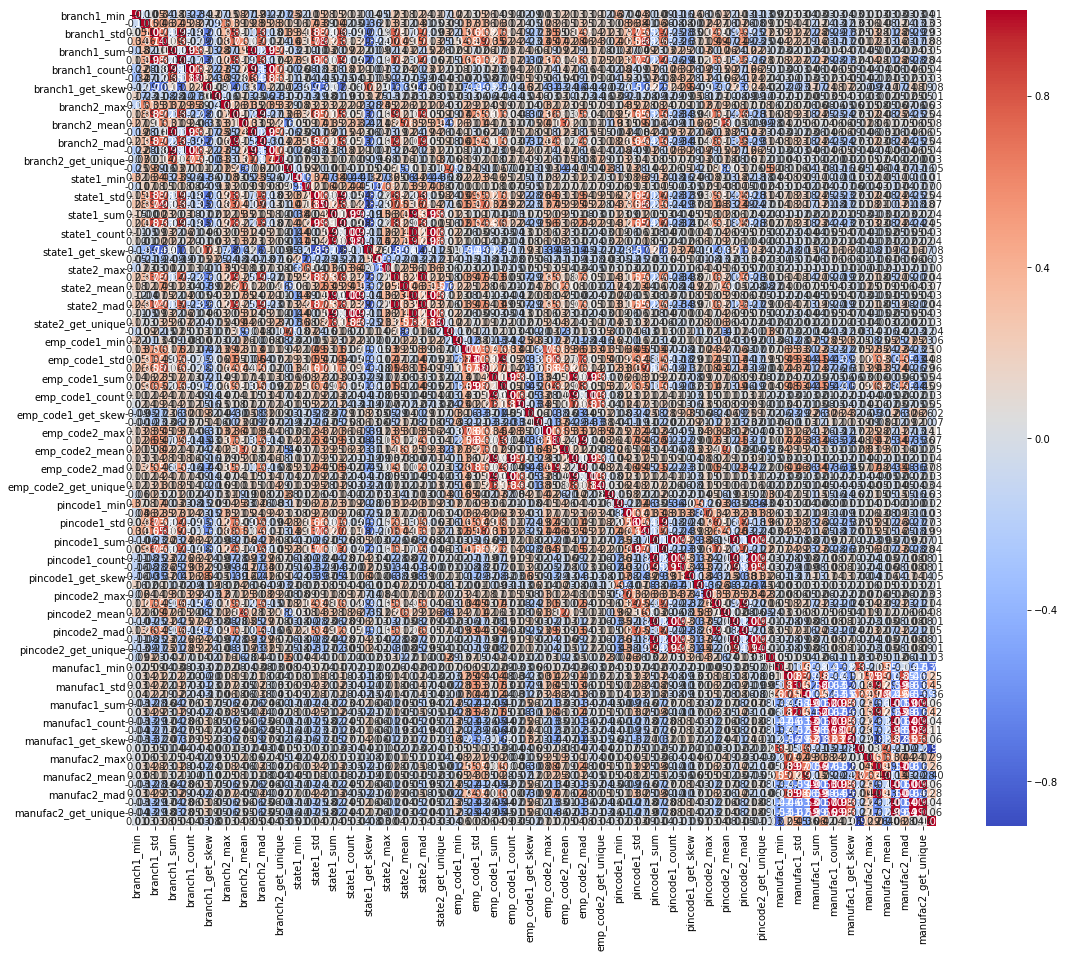

In [10]:
# list_float = df.select_dtypes(exclude=['object']).columns

fig, ax = plt.subplots(figsize=(18,15))
cm_df = sns.heatmap(train_df.iloc[:,-90:].corr(),annot=True, 
                    fmt = ".2f", cmap = "coolwarm", ax=ax)


In [12]:
sum_cols = [col for col in train_df.columns if col.endswith('_sum')]
train_df[sum_cols].max()

branch1_sum      9.639758e+08
branch2_sum      7.505172e+08
state1_sum       3.148244e+09
state2_sum       2.395758e+09
emp_code1_sum    4.508000e+07
emp_code2_sum    3.499543e+07
pincode1_sum     1.253412e+08
pincode2_sum     9.301771e+07
manufac1_sum     7.616920e+09
manufac2_sum     5.683629e+09
dtype: float64

In [17]:
train_df[sum_cols] = train_df[sum_cols]/10000
test_df[sum_cols]  = test_df[sum_cols]/10000


In [128]:
def run_lgb(splits, file_path, train_df, target, test_df, test_id, sub, leaves):
    from sklearn.model_selection import train_test_split, StratifiedKFold
    import lightgbm as lgb
    from sklearn.metrics import roc_auc_score

#     file_path = 'baseline3'
#     splits = 4
    random_seed = 2019
    features = train_df.columns
    param = {
        'bagging_freq'           : 5,
        'bagging_fraction'       : 0.33,
        'boost_from_average'     : 'false',
        'boost'                  : 'gbdt',
        'feature_fraction'       : 0.3,
        'learning_rate'          : 0.01,
        'max_depth'              : -1,
        'metric'                 : 'auc',
        'min_data_in_leaf'       : 100,
        'min_sum_hessian_in_leaf': 10.0,
        'num_leaves'             : leaves,
        'num_threads'            : 4,
        'tree_learner'           : 'serial',
        'objective'              : 'binary',
        'verbosity'              : 1,
    #     'lambda_l1'              : 0.001,
        'lambda_l2'              : 0.05
    }   

    n_splits = splits
    num_round = 10000
    folds = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_seed)
    oof_lgb = np.zeros(len(train_df))
    predictions = np.zeros(len(test_df))

    temp = train_df.apply(lambda x: pd.Series.value_counts(x).shape[0])
    cat_columns = list(temp[temp<50].index)

    for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, target.values)):
        print(trn_idx.shape, val_idx.shape)
        print("Fold {}".format(fold_))
        trn_data = lgb.Dataset(train_df.iloc[trn_idx][features], label=target.iloc[trn_idx],
                              feature_name=list(train_df.columns))#,
    #                           categorical_feature=cat_columns)

        val_data = lgb.Dataset(train_df.iloc[val_idx][features], label=target.iloc[val_idx],
                              feature_name=list(train_df.columns))#,
    #                           categorical_feature=cat_columns) 

        clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], 
                        verbose_eval=200, early_stopping_rounds = 25)
        oof_lgb[val_idx] = clf.predict(train_df.iloc[val_idx][features], 
                                   num_iteration=clf.best_iteration)
        predictions += clf.predict(test_df[features], num_iteration=clf.best_iteration) / folds.n_splits

        print( "  auc = ", roc_auc_score(target.iloc[val_idx], oof_lgb[val_idx]) )
        print("="*60)

#         break
    print("CV score: {:<8.5f}".format(roc_auc_score(target, oof_lgb)))

    sub_df = pd.DataFrame({"ID_code":test_id})
    sub_df["target"] = predictions

    sub_df.columns = sub.columns
    sub_df.to_csv('submission/lightgbm_target_{}.csv'.format(file_path), index=None)


    lgb_imp = pd.DataFrame(data=[clf.feature_name(), list(clf.feature_importance())]).T
    lgb_imp.columns = ['feature','imp']
    lgb_imp = lgb_imp.sort_values(by='imp', ascending=False)
    plt.figure(figsize=(12,15))
    plt.barh(lgb_imp.feature, lgb_imp.imp)
    plt.show()
    
    return clf, lgb_imp.head(50)

In [118]:
def run_cat(splits, file_path, train_df, target, test_df, test_id, sub, depth):
    
    from sklearn.model_selection import KFold, StratifiedKFold
    from sklearn.metrics import roc_auc_score
    from catboost import Pool, CatBoostClassifier
    import catboost

    features = train_df.columns
    random_seed = 2019
    
    model = CatBoostClassifier(loss_function         = "Logloss", 
                               eval_metric           = "AUC",
                               random_strength       = 1.5,
                               border_count          = 128,
                               scale_pos_weight      = 3.507,
                               depth                 = depth, 
                               early_stopping_rounds = 50,
                               random_seed           = 1337,
                               task_type             = 'CPU', 
    #                            subsample           = 0.7, 
                               iterations            = 10000, 
                               learning_rate         = 0.09,
                               thread_count          = 4
                              )


    n_split = splits
    kf = StratifiedKFold(n_splits=n_split, shuffle=True, random_state=random_seed)

    y_valid_pred = 0 * target
    oof_cat = np.zeros(len(train_df))
    y_test_pred = 0


    for idx, (train_index, valid_index) in enumerate(kf.split(train_df, target)):
        y_train, y_valid = target.iloc[train_index], target.iloc[valid_index]
        X_train, X_valid = train_df.iloc[train_index,:], train_df.iloc[valid_index,:]
        _train = Pool(X_train, label=y_train)#, cat_features=cate_features_index)
        _valid = Pool(X_valid, label=y_valid)#, cat_features=cate_features_index)
        print( "\nFold ", idx)

        fit_model = model.fit(_train, 
                              eval_set=_valid,
                              use_best_model=True,
                              verbose=100
                             )
        pred = fit_model.predict_proba(X_valid)[:,1]
        print( "  auc = ", roc_auc_score(y_valid, pred) )

        try:
            y_valid_pred.iloc[valid_index] = pred
        except:
            y_valid_pred.iloc[valid_index] = pred.reshape(-1,1)

        y_test_pred += fit_model.predict_proba(test_df)[:,1]

        oof_cat[valid_index] = fit_model.predict_proba(train_df.iloc[valid_index][features])[:,1]

        print("="*60)

    y_test_pred /= n_split


    print("CV score: {:<8.5f}".format(roc_auc_score(target, oof_cat)))
    sub_df = pd.DataFrame({"ID_code":test_id})
    sub_df["target"] = y_test_pred
    sub_df.columns = sub.columns


    sub_df.to_csv('submission/catboost_{}.csv'.format(file_path), index=None)


    cat_imp = pd.DataFrame(data=[fit_model.feature_names_, list(fit_model.feature_importances_)]).T
    cat_imp.columns = ['feature','imp']
    cat_imp = cat_imp.sort_values(by='imp', ascending=False).head(50)
    plt.figure(figsize=(12,15))
    plt.barh(cat_imp.feature, cat_imp.imp)
    plt.show()
    
    return fit_model, cat_imp

In [129]:
def run_xgb(splits, file_path, train_df, target, test_df, test_id, sub, depth):
    from sklearn.model_selection import StratifiedKFold
    from sklearn.metrics import roc_auc_score
    import xgboost as xgb

    features = train_df.columns
    params = {
        'eval_metric'     : 'auc',
        'seed'            : 1337,
        'eta'             : 0.05,
        'subsample'       : 0.7,
        'colsample_bytree': 0.5,
        'silent'          : 1,
        'nthread'         : 4,
        'Scale_pos_weight': 3.607,
        'objective'       : 'binary:logistic',
        'max_depth'       : depth,
        'alpha'           : 0.05
    }

    random_seed = 2019
    n_splits = splits
    verbose_eval = 200
    early_stop = 50
    num_rounds = 10000


    folds = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_seed)
    oof_xgb = np.zeros(len(train_df))
    test_pred = np.zeros((len(test_df),n_splits))

    for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, target.values)):
        print("Fold {}".format(fold_))

        d_train = xgb.DMatrix( data          = train_df.iloc[trn_idx][features], 
                               label         = target.iloc[trn_idx], 
                               feature_names = train_df.columns)
        d_valid = xgb.DMatrix( data          = train_df.iloc[val_idx][features], 
                               label         = target.iloc[val_idx], 
                               feature_names = train_df.columns)

        watchlist = [(d_valid, 'valid')]
        model = xgb.train(dtrain=d_train, num_boost_round=num_rounds, 
                          evals=watchlist,
                          early_stopping_rounds=early_stop, 
                          verbose_eval=verbose_eval, params=params)

        valid_pred = model.predict(xgb.DMatrix(train_df.iloc[val_idx][features], 
                                               feature_names=train_df.columns), 
                                   ntree_limit=model.best_ntree_limit)



        test_pred[:,fold_] = model.predict(xgb.DMatrix(test_df[features], 
                                                       feature_names=train_df.columns), 
                                          ntree_limit=model.best_ntree_limit)

        oof_xgb[val_idx]   = valid_pred
    #     predictions   += test_pred

#         break

    print("CV score: {:<8.5f}".format(roc_auc_score(target, oof_xgb)))

    sub_df = pd.DataFrame({"id":test_id})
    sub_df["target"] = test_pred.mean(axis=1)
    sub_df.columns = sub.columns
    
    sub_df.to_csv('submission/xgboost_{}.csv'.format(file_path), index=None)

    sub_df.head()

    xgb_imp = pd.DataFrame(data=[list(model.get_fscore().keys()), list(model.get_fscore().values())]).T
    xgb_imp.columns = ['feature','imp']
    xgb_imp = xgb_imp.sort_values(by='imp', ascending=False)
    plt.figure(figsize=(12,15))
    plt.barh(xgb_imp.feature, xgb_imp.imp)

    return model, xgb_imp

In [22]:
train_df_save1 = train_df.copy()
test_df_save1  = test_df.copy()

train_df.drop(['UniqueID','loan_default'], axis=1, inplace=True)
test_df.drop('UniqueID', axis=1, inplace=True)

train_df.reset_index(drop=True, inplace=True)
target = train_df_save1.loan_default
test_id = test_df_save1.UniqueID

train_df_save1.shape, train_df.shape

((224607, 142), (224607, 140))


Fold  0
0:	test: 0.5973679	best: 0.5973679 (0)	total: 96.8ms	remaining: 16m 7s
100:	test: 0.6634901	best: 0.6634901 (100)	total: 12.2s	remaining: 20m
200:	test: 0.6707031	best: 0.6707031 (200)	total: 26.3s	remaining: 21m 23s
300:	test: 0.6737823	best: 0.6737823 (300)	total: 39.9s	remaining: 21m 26s
400:	test: 0.6751633	best: 0.6751639 (397)	total: 54.8s	remaining: 21m 52s
500:	test: 0.6759249	best: 0.6759249 (500)	total: 1m 9s	remaining: 21m 49s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6760217245
bestIteration = 504

Shrink model to first 505 iterations.
  auc =  0.676021724477782

Fold  1
0:	test: 0.6108827	best: 0.6108827 (0)	total: 165ms	remaining: 27m 25s
100:	test: 0.6648952	best: 0.6648952 (100)	total: 13.9s	remaining: 22m 46s
200:	test: 0.6712619	best: 0.6712660 (199)	total: 25.8s	remaining: 20m 55s
300:	test: 0.6731151	best: 0.6731333 (297)	total: 37.1s	remaining: 19m 56s
400:	test: 0.6742014	best: 0.6742014 (400)	total: 51.4s	remaining: 20m 29s
Stop

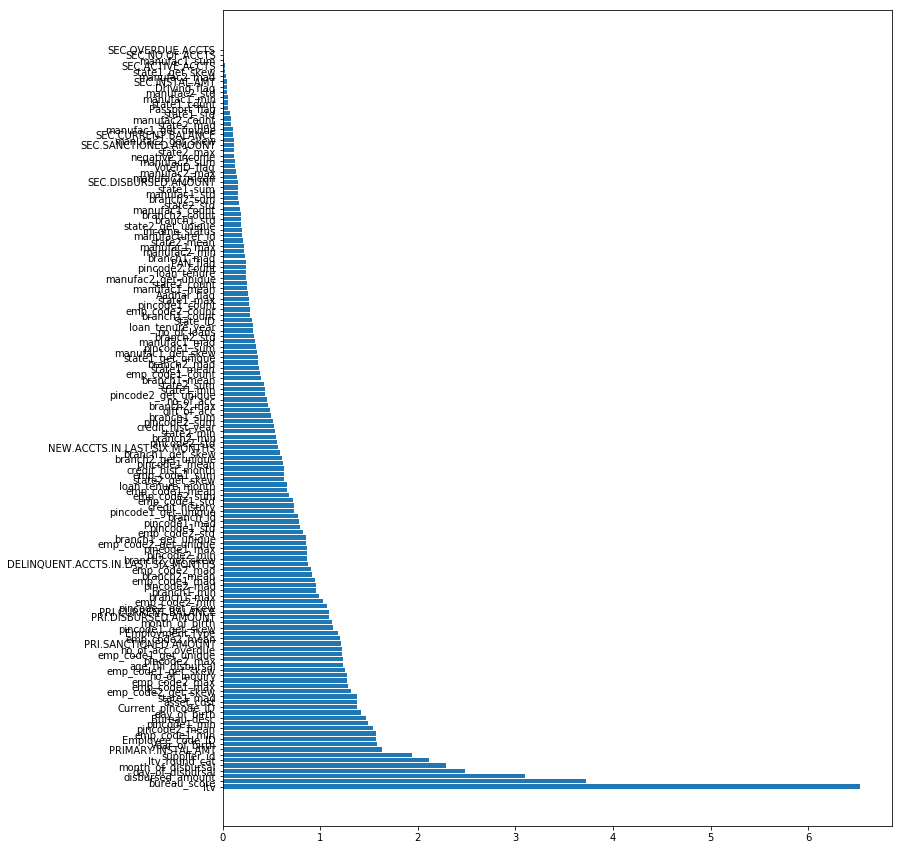

In [30]:
# run_lgb(3, 'feat1', train_df, target, test_df, test_id, sub)
cat_model1, cat_imp1 = run_cat(3, 'feat_cat1', train_df, target, test_df, test_id, sub, 6)


<BarContainer object of 50 artists>

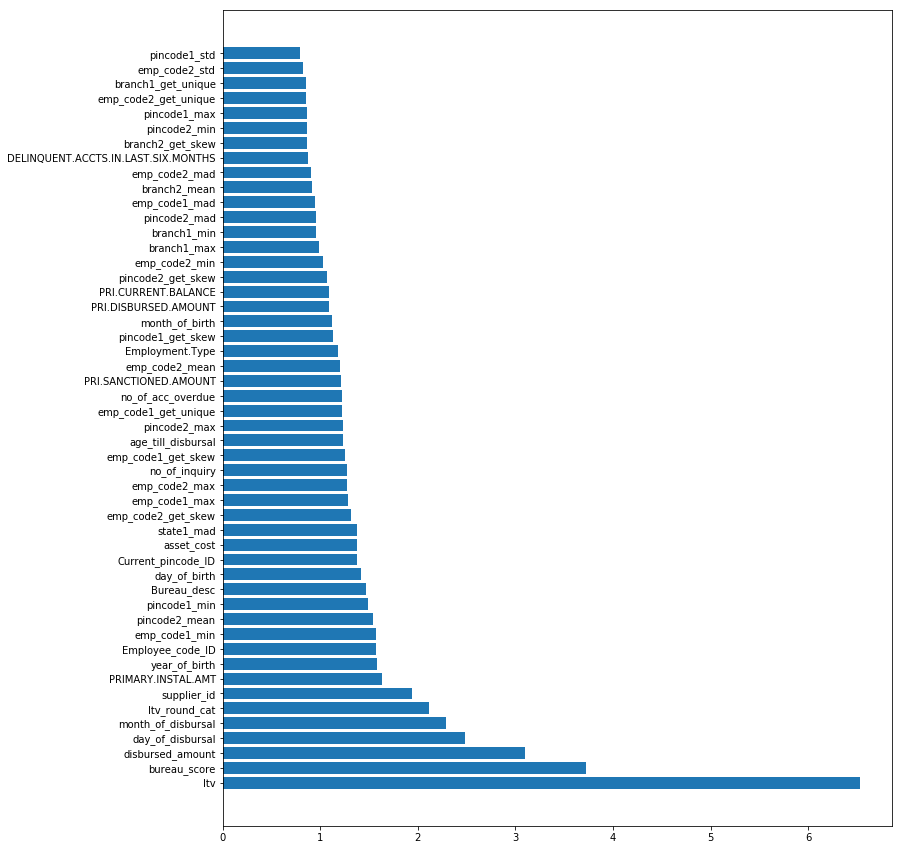

In [33]:
plt.figure(figsize=(12,15))
plt.barh(cat_imp1.feature, cat_imp1.imp)


In [34]:
import shap
shap.initjs()


In [36]:
from sklearn.model_selection import KFold, StratifiedKFold

kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=2019)
for idx, (train_index, valid_index) in enumerate(kf.split(train_df, target)):
    _, y_valid = target.iloc[train_index], target.iloc[valid_index]
    _, X_valid = train_df.iloc[train_index,:], train_df.iloc[valid_index,:]

/home/ankish/anaconda3/lib/python3.6/site-packages/catboost/core.py:1643: UserWarning: fstr_type soon be deprecated, use type instead
  warnings.warn("fstr_type soon be deprecated, use type instead")


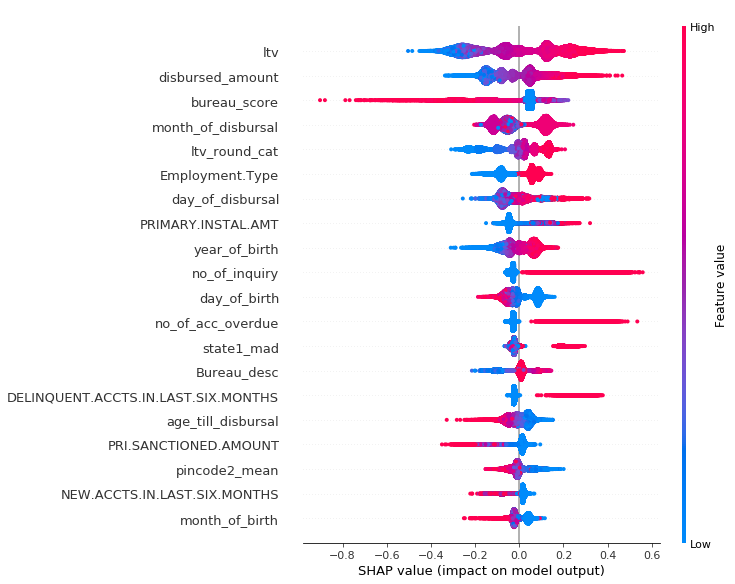

In [37]:
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(cat_model1)
shap_values = explainer.shap_values(X_valid)
# shap.dependence_plot("RM", shap_values, X_valid)
shap.summary_plot(shap_values, X_valid)
# shap.summary_plot(shap_values, X, plot_type="bar")


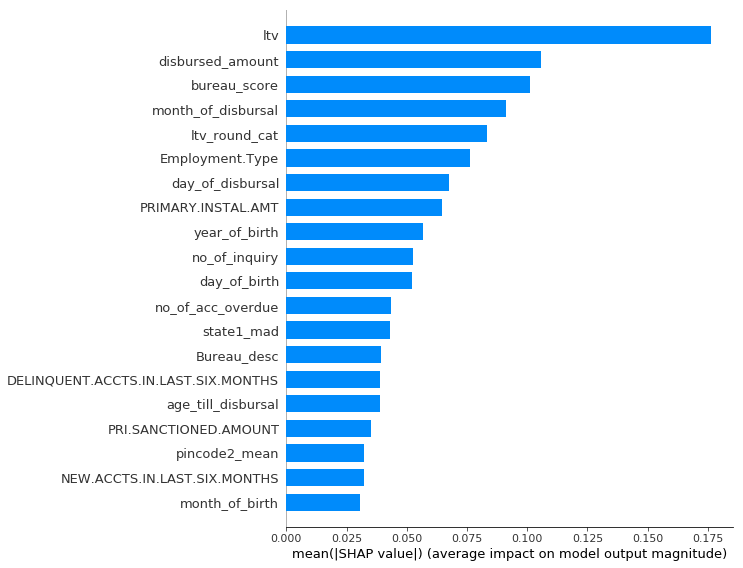

In [38]:
shap.summary_plot(shap_values, X_valid, plot_type="bar")


(149737,) (74870,)
Fold 0
Training until validation scores don't improve for 25 rounds.
[200]	training's auc: 0.691855	valid_1's auc: 0.664703
[400]	training's auc: 0.711697	valid_1's auc: 0.670993
[600]	training's auc: 0.728885	valid_1's auc: 0.674853
[800]	training's auc: 0.743966	valid_1's auc: 0.677271
[1000]	training's auc: 0.757164	valid_1's auc: 0.678555
[1200]	training's auc: 0.769127	valid_1's auc: 0.679395
Early stopping, best iteration is:
[1280]	training's auc: 0.773755	valid_1's auc: 0.679493
  auc =  0.6794925203305826


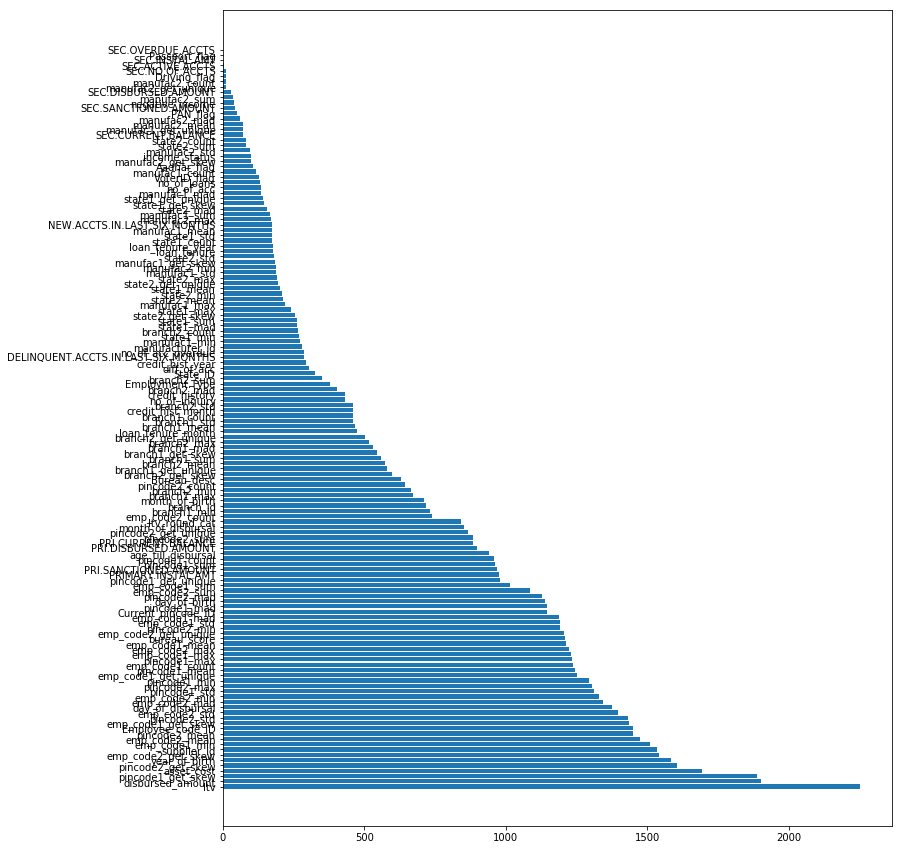

In [46]:
lgb_model1, lgb_imp1 = run_lgb(3, 'feat_lgb1', train_df, target, test_df, test_id, sub, 70)


<BarContainer object of 50 artists>

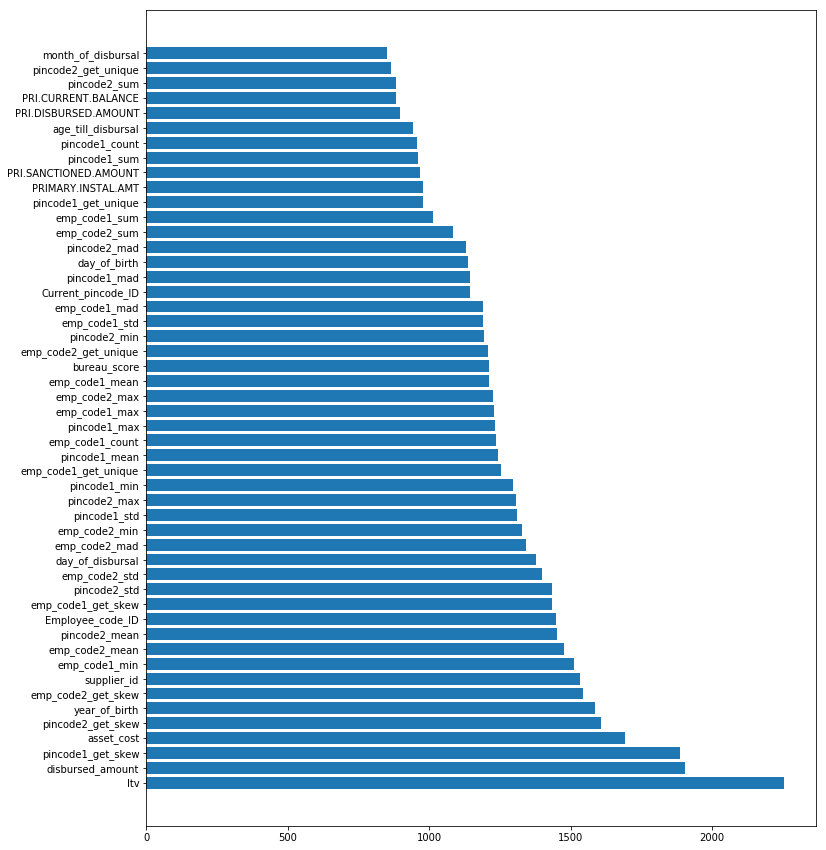

In [47]:
plt.figure(figsize=(12,15))
plt.barh(lgb_imp1.feature, lgb_imp1.imp)


In [48]:
explainer = shap.TreeExplainer(lgb_model1)
shap_values = explainer.shap_values(X_valid)
# shap.dependence_plot("RM", shap_values, X_valid)
shap.summary_plot(shap_values, X_valid)


AttributeError: 'Booster' object has no attribute 'params'

In [ ]:
shap.summary_plot(shap_values, X_valid, plot_type="bar")


Fold 0
[0]	valid-auc:0.617652
Will train until valid-auc hasn't improved in 50 rounds.
[200]	valid-auc:0.672687
[400]	valid-auc:0.676836
[600]	valid-auc:0.677859
Stopping. Best iteration:
[602]	valid-auc:0.677885



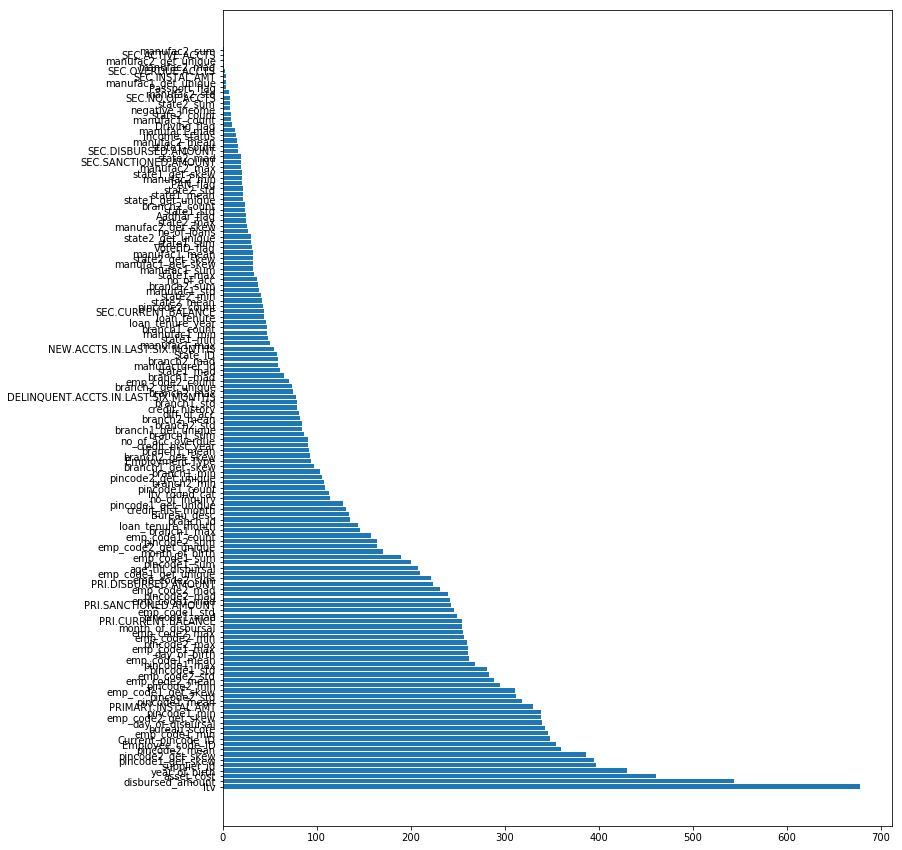

In [55]:
xgb_model1, xgb_imp1 = run_xgb(3, 'feat_xgb1', train_df, target, 
                               test_df, test_id, sub, 5)


<BarContainer object of 50 artists>

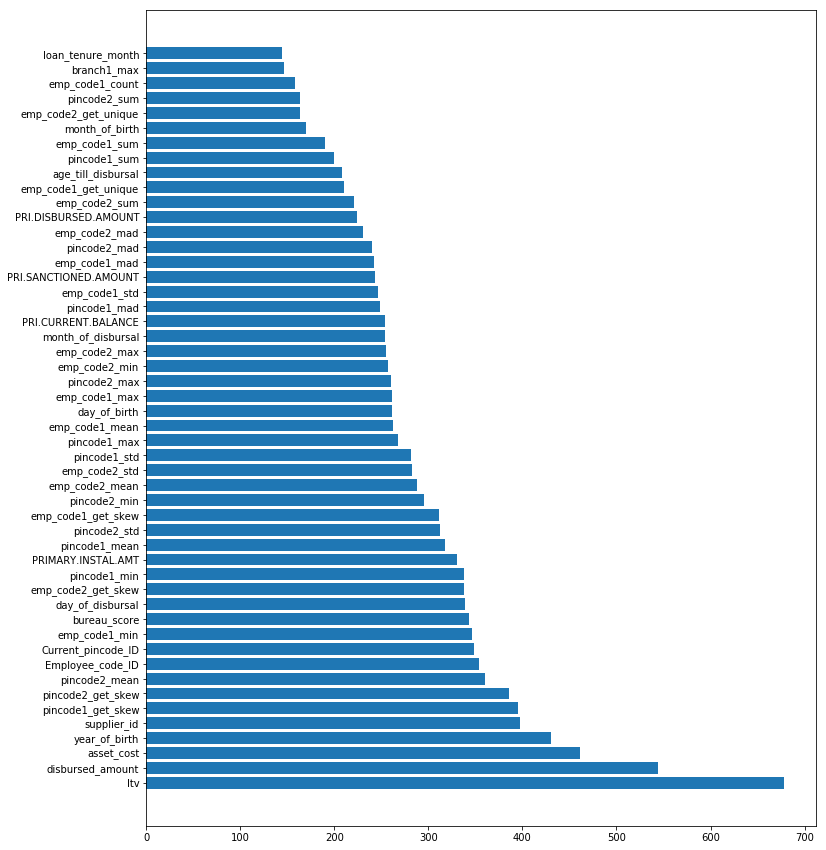

In [57]:
xgb_imp1 = xgb_imp1.head(50)
plt.figure(figsize=(12,15))
plt.barh(xgb_imp1.feature, xgb_imp1.imp)


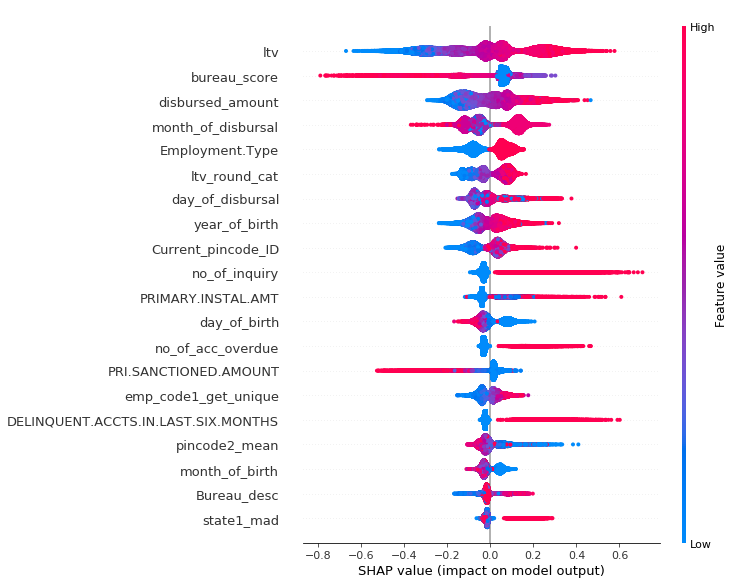

In [58]:
explainer = shap.TreeExplainer(xgb_model1)
shap_values = explainer.shap_values(X_valid)
# shap.dependence_plot("RM", shap_values, X_valid)
shap.summary_plot(shap_values, X_valid)


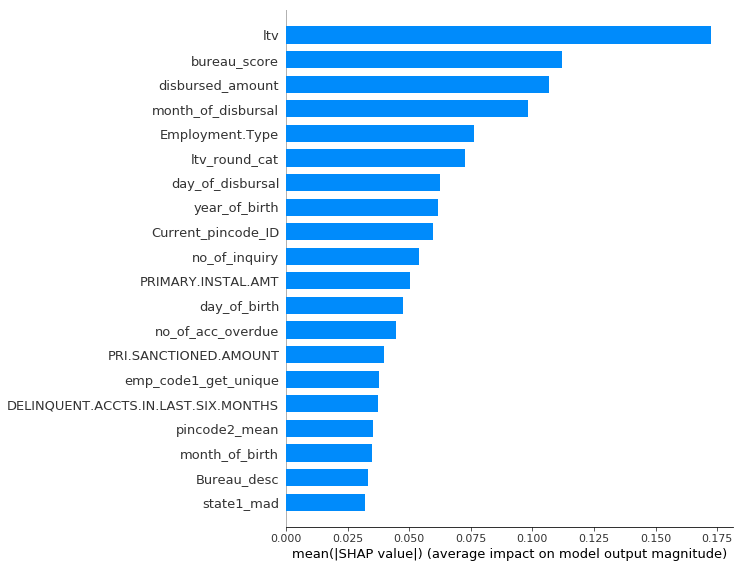

In [59]:
shap.summary_plot(shap_values, X_valid, plot_type="bar")


In [ ]:
# kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=2019)

# for idx, (train_index, valid_index) in enumerate(kf.split(train_df, target)):
#     y_train, y_valid = target.iloc[train_index], target.iloc[valid_index]
#     X_train, X_valid = train_df.iloc[train_index,:], train_df.iloc[valid_index,:] 
#     break
    

In [108]:
def run_rf(splits, file_path, train_df, target, test_df, test_id, sub, depth, estimators):
    from sklearn.model_selection import StratifiedKFold
    from sklearn.metrics import roc_auc_score
    from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


    features = train_df.columns
    
    random_seed  = 2019
    n_splits     = splits
    verbose_eval = 200
    early_stop   = 50
    num_rounds   = 10000


    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_seed)
    oof_xgb = np.zeros(len(train_df))
    test_pred = np.zeros((len(test_df),n_splits))

    for idx, (train_index, valid_index) in enumerate(kf.split(train_df, target)):
        y_train, y_valid = target.iloc[train_index], target.iloc[valid_index]
        X_train, X_valid = train_df.iloc[train_index,:], train_df.iloc[valid_index,:] 
        
        clf = RandomForestClassifier(
                                n_estimators = estimators, 
                                criterion = 'gini', 
                                max_depth = depth, 
                                # min_samples_split = 2, 
                                # min_samples_leaf = 1, 
                                # min_weight_fraction_leaf = 0.0, 
                                max_features = 'auto', 
                                # max_leaf_nodes = None, 
                                # min_impurity_decrease = 0.0, 
                                bootstrap = True, 
                                oob_score = True, 
                                n_jobs = 4, 
                                random_state = 1337, 
                                verbose = 1, 
                                class_weight = 'balanced')#3.607)
        clf.fit(X_train, y_train)
#         valid_pred = clf.predict(X_valid)
#         print("CV score: {:<8.5f}".format(roc_auc_score(X_valid, valid_pred)))
        
        valid_pred = clf.predict_proba(X_valid)[:,1]
        print("CV score: {:<8.5f}".format(roc_auc_score(y_valid, valid_pred)))
#         test_pred = clf.predict()
#         oof_xgb[val_idx]   = valid_pred
    #     predictions   += test_pred

        break

#     print("CV score: {:<8.5f}".format(roc_auc_score(target, oof_xgb)))

#     sub_df = pd.DataFrame({"id":ts_ids})
#     sub_df["target"] = test_pred.mean(axis=1)
#     # sub_df.target = np.where(sub_df.target>0.5,1,0)

#     sub_df.columns = sub.columns
#     sub_df.to_csv('submission/xgboost_{}.csv'.format(file_path), index=None)

#     sub_df.head()

#     xgb_imp = pd.DataFrame(data=[list(model.get_fscore().keys()), list(model.get_fscore().values())]).T
#     xgb_imp.columns = ['feature','imp']
#     xgb_imp = xgb_imp.sort_values(by='imp', ascending=False)
#     plt.figure(figsize=(12,15))
#     plt.barh(xgb_imp.feature, xgb_imp.imp)

    return clf#, xgb_imp

In [81]:
rf_model1 = run_rf(3, 'feat_rf1', train_df.fillna(0), target, test_df.fillna(0), test_id, sub, 6)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   21.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   49.9s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:   55.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.7s


CV score: 0.64665 


[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    2.0s finished


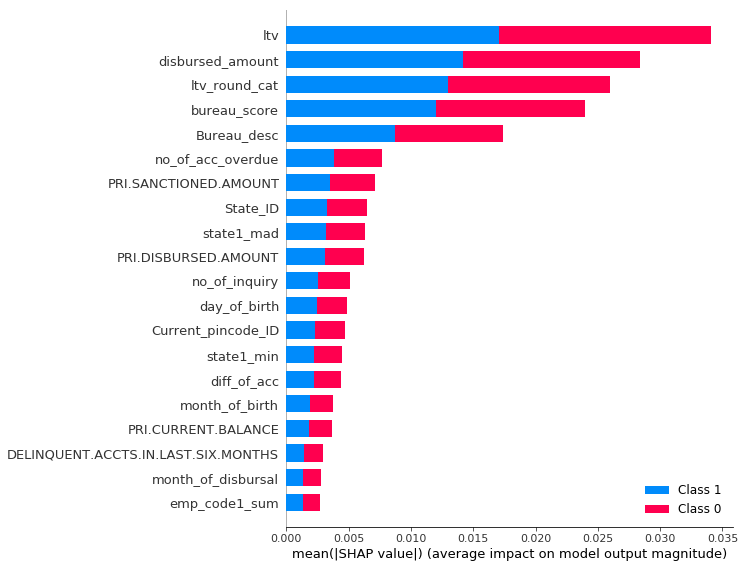

In [82]:
explainer = shap.TreeExplainer(rf_model1)
shap_values = explainer.shap_values(X_valid)
# shap.dependence_plot("RM", shap_values, X_valid)
shap.summary_plot(shap_values, X_valid)


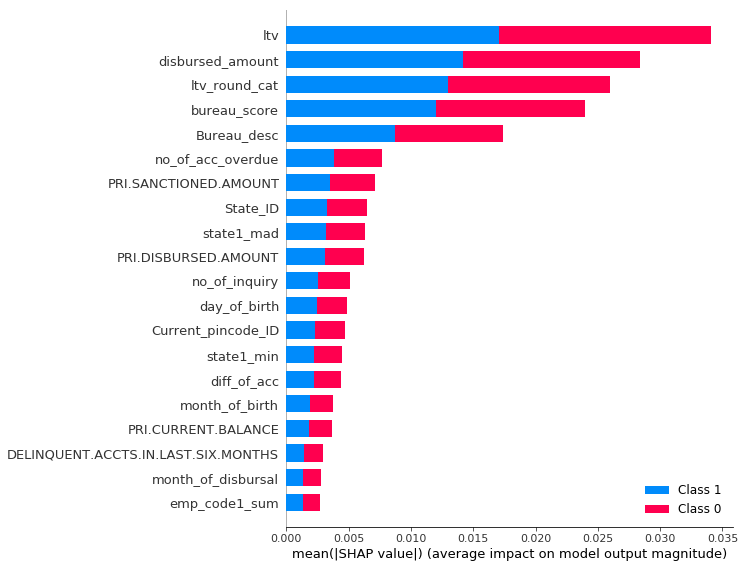

In [83]:
shap.summary_plot(shap_values, X_valid, plot_type="bar")


In [84]:
cor = train_df.corr()
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array
cor = cor.stack()
# cor[(cor > 0.1) | (cor < -0.1)]


In [107]:
# cor[(cor > 0.5) | (cor < -0.5)].abs().sort_values()


In [101]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between loss
#     y = x['loss']
#     x = x.drop(columns = ['loss'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
#     x = x.drop(columns = drops)
    
    # Add the score back in to the data
#     x['loss'] = y
               
    return drops

In [102]:
drop_cols = remove_collinear_features(train_df, 0.5)
len(drop_cols)

90

In [103]:
drop_cols

{'Bureau_desc',
 'SEC.DISBURSED.AMOUNT',
 'SEC.INSTAL.AMT',
 'VoterID_flag',
 'age_till_disbursal',
 'branch1_count',
 'branch1_get_skew',
 'branch1_get_unique',
 'branch1_mad',
 'branch1_mean',
 'branch1_std',
 'branch2_count',
 'branch2_get_skew',
 'branch2_get_unique',
 'branch2_mad',
 'branch2_max',
 'branch2_mean',
 'branch2_std',
 'branch2_sum',
 'bureau_score',
 'credit_history',
 'diff_of_acc',
 'emp_code1_count',
 'emp_code1_get_unique',
 'emp_code1_mad',
 'emp_code1_max',
 'emp_code1_mean',
 'emp_code1_std',
 'emp_code2_count',
 'emp_code2_get_unique',
 'emp_code2_mad',
 'emp_code2_max',
 'emp_code2_mean',
 'emp_code2_std',
 'emp_code2_sum',
 'income_status',
 'loan_tenure',
 'loan_tenure_month',
 'loan_tenure_year',
 'ltv_round_cat',
 'manufac1_count',
 'manufac1_get_skew',
 'manufac1_get_unique',
 'manufac1_mad',
 'manufac1_mean',
 'manufac1_std',
 'manufac1_sum',
 'manufac2_count',
 'manufac2_get_skew',
 'manufac2_get_unique',
 'manufac2_mad',
 'manufac2_max',
 'manufac2_m

In [113]:
# 0.64048 == depth=6
rf_model2 = run_rf(3, 'feat_rf1', train_df.drop(list(drop_cols), axis=1).fillna(0), 
                   target, test_df.drop(list(drop_cols), axis=1).fillna(0), test_id, 
                   sub, 5, 1000)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   14.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   33.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   59.5s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:  1.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.2s


CV score: 0.63608 


[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.8s finished


In [114]:
np.argmax(rf_model2.feature_importances_), train_df.columns[2]

(2, 'ltv')

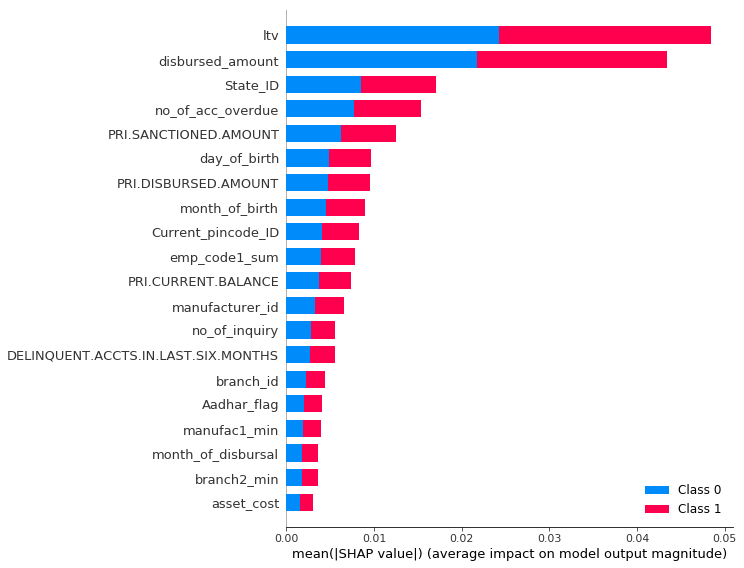

In [117]:
explainer = shap.TreeExplainer(rf_model2)
shap_values = explainer.shap_values(X_valid.drop(list(drop_cols), axis=1))
# shap.dependence_plot("RM", shap_values, X_valid)
shap.summary_plot(shap_values, X_valid.drop(list(drop_cols), axis=1))



Fold  0
0:	test: 0.5936610	best: 0.5936610 (0)	total: 65.2ms	remaining: 10m 51s
100:	test: 0.6543466	best: 0.6543466 (100)	total: 9.05s	remaining: 14m 47s
200:	test: 0.6611572	best: 0.6611572 (200)	total: 17.2s	remaining: 13m 59s
300:	test: 0.6640883	best: 0.6640883 (300)	total: 26.1s	remaining: 14m 1s
400:	test: 0.6662472	best: 0.6662666 (397)	total: 35s	remaining: 13m 58s
500:	test: 0.6675187	best: 0.6675187 (500)	total: 43.1s	remaining: 13m 37s
600:	test: 0.6684336	best: 0.6684346 (599)	total: 51.2s	remaining: 13m 20s
700:	test: 0.6690821	best: 0.6690943 (699)	total: 59.1s	remaining: 13m 4s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6690942721
bestIteration = 699

Shrink model to first 700 iterations.
  auc =  0.6690942721166875

Fold  1
0:	test: 0.5939369	best: 0.5939369 (0)	total: 81.2ms	remaining: 13m 32s
100:	test: 0.6567871	best: 0.6567871 (100)	total: 9.66s	remaining: 15m 46s
200:	test: 0.6632393	best: 0.6632393 (200)	total: 19.3s	remaining: 15m 42s
3

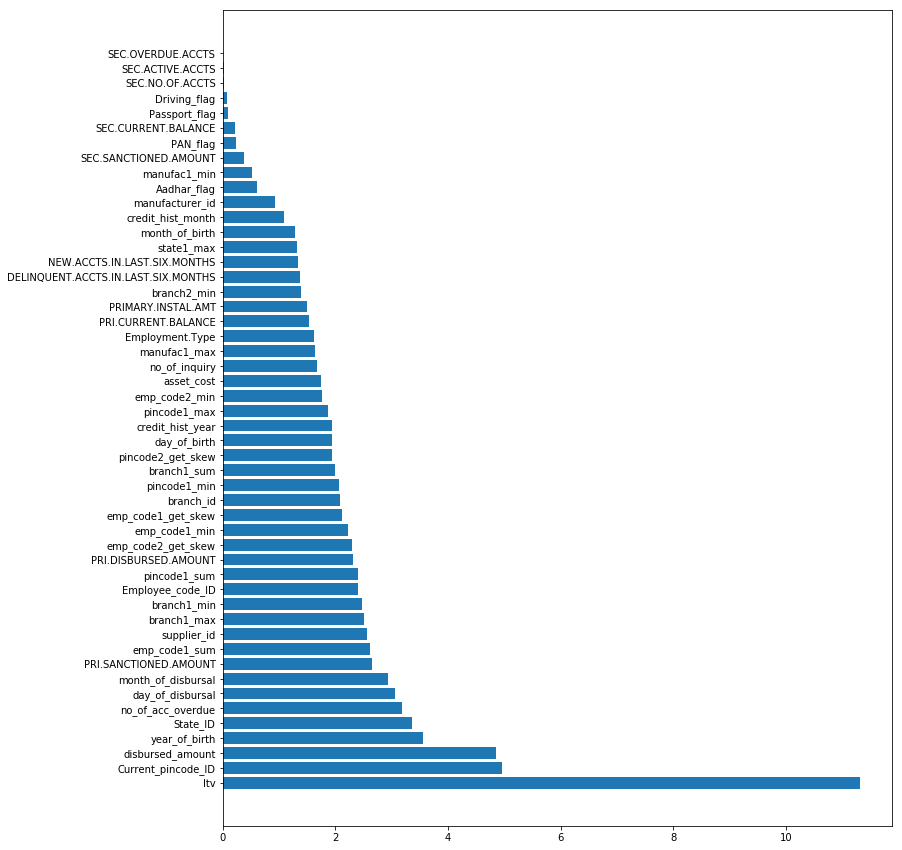

In [119]:
cat_model2, cat_imp2 = run_cat(3, 'feat_cat2', train_df.drop(list(drop_cols), axis=1), 
                               target, test_df.drop(list(drop_cols), axis=1), test_id, 
                               sub, 5)


/home/ankish/anaconda3/lib/python3.6/site-packages/catboost/core.py:1643: UserWarning: fstr_type soon be deprecated, use type instead
  warnings.warn("fstr_type soon be deprecated, use type instead")


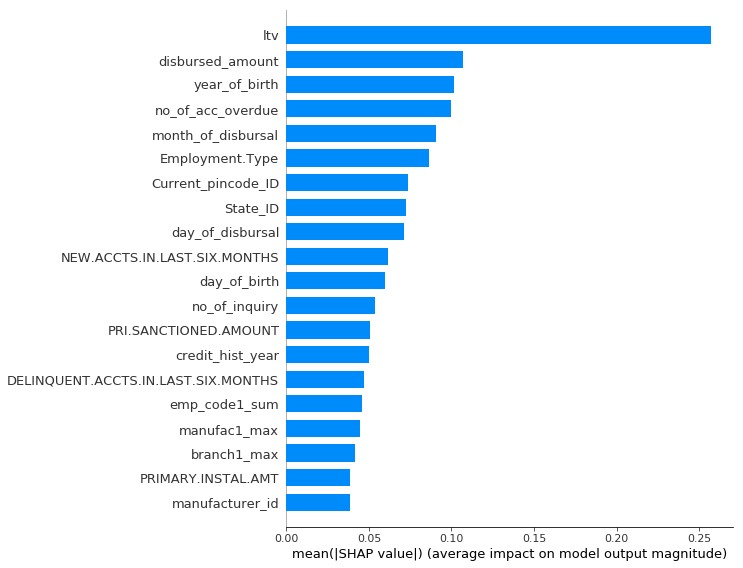

In [120]:
explainer = shap.TreeExplainer(cat_model2)
shap_values = explainer.shap_values(X_valid.drop(list(drop_cols), axis=1))
# shap.dependence_plot("RM", shap_values, X_valid)
shap.summary_plot(shap_values, X_valid.drop(list(drop_cols), axis=1), plot_type="bar")


(149737,) (74870,)
Fold 0
Training until validation scores don't improve for 25 rounds.
[200]	training's auc: 0.691855	valid_1's auc: 0.664703
[400]	training's auc: 0.711697	valid_1's auc: 0.670993
[600]	training's auc: 0.728885	valid_1's auc: 0.674853
[800]	training's auc: 0.743966	valid_1's auc: 0.677271
[1000]	training's auc: 0.757164	valid_1's auc: 0.678555
[1200]	training's auc: 0.769127	valid_1's auc: 0.679395
Early stopping, best iteration is:
[1280]	training's auc: 0.773755	valid_1's auc: 0.679493
  auc =  0.6794925203305826
(149738,) (74869,)
Fold 1
Training until validation scores don't improve for 25 rounds.
[200]	training's auc: 0.692655	valid_1's auc: 0.664589
[400]	training's auc: 0.713131	valid_1's auc: 0.671206
[600]	training's auc: 0.730662	valid_1's auc: 0.674577
[800]	training's auc: 0.74589	valid_1's auc: 0.676058
[1000]	training's auc: 0.759364	valid_1's auc: 0.676788
Early stopping, best iteration is:
[1010]	training's auc: 0.760053	valid_1's auc: 0.67689
  auc = 

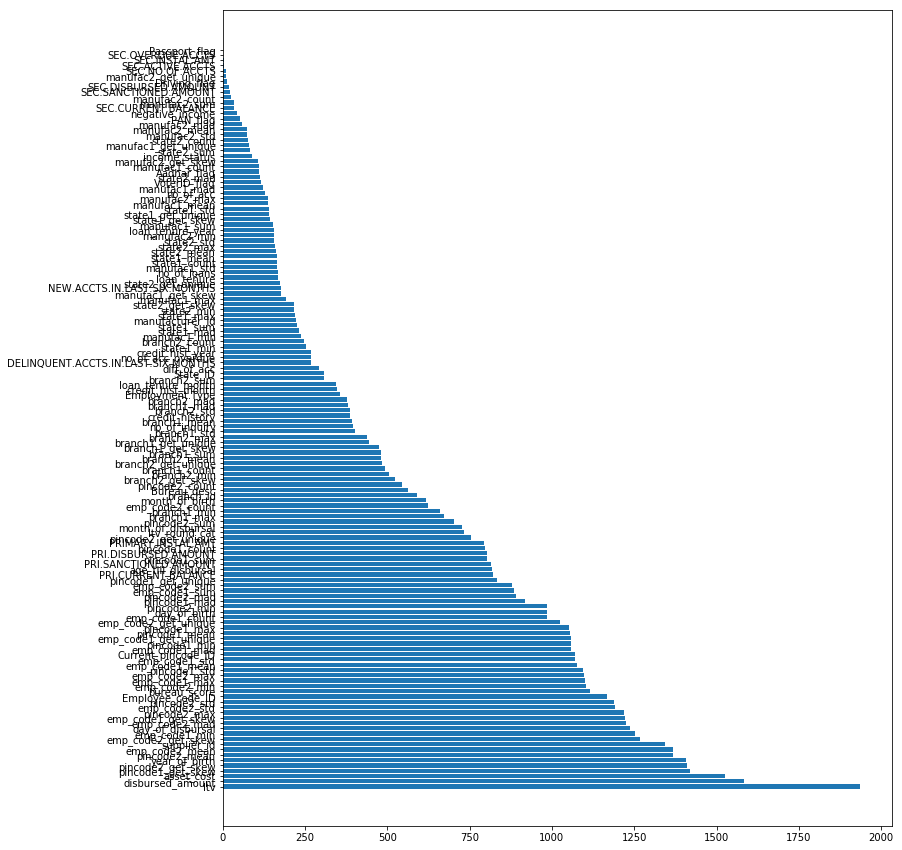

In [130]:
lgb_model2, lgb_imp2 = run_lgb(3, 'feat_lgb2', train_df, target, test_df, 
                               test_id, sub, 70)


In [131]:
xgb_model2, xgb_imp2 = run_xgb(3, 'feat_xgb2', train_df, target, 
                               test_df, test_id, sub, 6)


Fold 0
[0]	valid-auc:0.620143
Will train until valid-auc hasn't improved in 50 rounds.
[200]	valid-auc:0.674375
[400]	valid-auc:0.67733
Stopping. Best iteration:
[433]	valid-auc:0.677452

Fold 1
[0]	valid-auc:0.610164
Will train until valid-auc hasn't improved in 50 rounds.
[200]	valid-auc:0.673632
[400]	valid-auc:0.674465
Stopping. Best iteration:
[368]	valid-auc:0.674756

Fold 2
[0]	valid-auc:0.616579
Will train until valid-auc hasn't improved in 50 rounds.
[200]	valid-auc:0.669831
[400]	valid-auc:0.671814
Stopping. Best iteration:
[396]	valid-auc:0.671903

CV score: 0.67470 


NameError: name 'ts_ids' is not defined

In [ ]:
lgb_model22, lgb_imp22 = run_lgb(3, 'feat_lgb22', train_df.drop(list(drop_cols), axis=1), 
                                 target, test_df.drop(list(drop_cols), axis=1), 
                                 test_id, sub, 30)


In [ ]:
xgb_model22, xgb_imp22 = run_xgb(3, 'feat_xgb22', train_df.drop(list(drop_cols), axis=1), 
                                 target, test_df.drop(list(drop_cols), axis=1), 
                                 test_id, sub, 5)


In [ ]:
xgb_model222, xgb_imp222 = run_xgb(3, 'feat_xgb222', train_df.drop(list(drop_cols), axis=1), 
                                   target, test_df.drop(list(drop_cols), axis=1), 
                                   test_id, sub, 4)


In [145]:
train_df_save1.to_csv('store_data/train_df_save3.csv',index=None)
test_df_save1.to_csv('store_data/test_df_save3.csv',index=None)


In [139]:
train_df.drop(list(drop_cols), axis=1).columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id',
       'manufacturer_id', 'Current_pincode_ID', 'Employment.Type', 'State_ID',
       'Employee_code_ID', 'Aadhar_flag', 'PAN_flag', 'Driving_flag',
       'Passport_flag', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'PRIMARY.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'day_of_birth', 'month_of_birth',
       'year_of_birth', 'credit_hist_year', 'credit_hist_month',
       'day_of_disbursal', 'month_of_disbursal', 'no_of_acc_overdue',
       'no_of_inquiry', 'branch1_min', 'branch1_max', 'branch1_sum',
       'branch2_min', 'state1_max', 'emp_code1_min', 'emp_code1_sum',
       'emp_code1_get_skew', 'emp_code2_min', 'emp_code2_get_skew',
       'pincode1_min', 'pincode1_max', 'pincode1_sum', 'pincode2_get_skew'

In [146]:
cols_for_pca = [col for col in list(drop_cols) if col.startswith('branch') or \
                col.startswith('state') or col.startswith('emp_code') or \
                col.startswith('manufac') or col.startswith('pincode')]
# pca_tr = train_df[cols_for_pca]
# pca_ts = test_df[cols_for_pca]


In [147]:
!ls submission/

catboost_feat_cat1.csv	       lightgbm_target_baseline2.zip
catboost_feat_cat2.csv	       lightgbm_target_baseline3.csv
check.zip		       lightgbm_target_baseline3.zip
lightgbm_target_baseline1.csv  lightgbm_target_baseline.csv
lightgbm_target_baseline1.zip  lightgbm_target_feat_lgb2.csv
lightgbm_target_baseline2.csv


In [148]:
!zip submission/catboost_feat_cat1.zip submission/catboost_feat_cat1.csv
!zip submission/catboost_feat_cat2.zip submission/catboost_feat_cat2.csv

  adding: submission/catboost_feat_cat1.csv (deflated 54%)
  adding: submission/catboost_feat_cat2.csv (deflated 54%)
